# With this notebook we will:
## 1. Install packages needed for root
## 2. Download a binary root that compiled in google drive "colaboratory" environement
## 3. Modify the PATH in order to tell python where to look for pyROOT
## 4. Finally, a basic analysis example with pyROOT

##### Author: Jose Ruiz
##### Maintainer: Jose Ruiz
##### Developed at: Universidad de Antioquia


### 1. Install packages needed for root

In [1]:
!apt-get install git dpkg-dev cmake g++ gcc binutils libx11-dev libxpm-dev libxft-dev libxext-dev tar gfortran subversion

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libxext-dev is already the newest version (2:1.3.3-1).
libxft-dev is already the newest version (2.3.2-1).
libxpm-dev is already the newest version (1:3.5.12-1).
subversion is already the newest version (1.9.7-4ubuntu1).
binutils is already the newest version (2.30-21ubuntu1~18.04.2).
cmake is already the newest version (3.10.2-1ubuntu2.18.04.1).
dpkg-dev is already the newest version (1.19.0.5ubuntu2.3).
g++ is already the newest version (4:7.4.0-1ubuntu2.3).
gcc is already the newest version (4:7.4.0-1ubuntu2.3).
gfortran is already the newest version (4:7.4.0-1ubuntu2.3).
git is already the newest version (1:2.17.1-1ubuntu0.4).
libx11-dev is already the newest version (2:1.6.4-3ubuntu0.2).
tar is already the newest version (1.29b-2ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 33 not upgraded.


### 2. Mount the drive to get the root binary and untar it 

In [2]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls "/content/drive/Shared drives/PyROOT_in_Google/"


BasicAnalysis.ipynb	  HistogrammingInROOT.ipynb
BasicPyROOTExample.ipynb  monje-a-lo-bonzo-blanco-y-negro.png
Chi2Fitting.ipynb	  piano-C5.wav
Data5.root		  Random2DHistos
DatosParcial2		  root_build_google_yikes.tar
DatosResonancia.root	  Temporal
FFT_imagen.ipynb	  TrimmedTree.root
FFT.ipynb		  TTreeExcercise.ipynb
FLUTEMI.WAV


In [0]:
!tar -xf /content/drive/Shared\ drives/PyROOT_in_Google/root_build_google_yikes.tar

In [6]:
!ls -ltrh

total 332K
drwxr-xr-x 44 root root 4.0K Sep 20  2018 root_build
drwxr-xr-x  1 root root 4.0K Nov  6 16:17 sample_data
-rw-r--r--  1 root root 319K Nov 18 00:44 N1041328785.root
drwx------  4 root root 4.0K Nov 18 02:22 drive



### 3. Modify the PATH in order to tell python where to look for pyROOT


In [0]:
import sys
sys.path.append("/content/root_build/")
sys.path.append("/content/root_build/bin/")
sys.path.append("/content/root_build/include/")
sys.path.append("/content/root_build/lib/")

# Now let's analyze the data contained in TrimmedTree.root file

### Importing necessary libraries

In [8]:
import ROOT
import numpy as np
import numpy.random as rnd
import scipy as spy
from scipy.integrate import quad, nquad
import matplotlib.pyplot as plt
import sympy as sp

Welcome to JupyROOT 6.14/04


### Reading tree in root file

### Getting the number of events contained in the tree

### Loop over the events

#Parcial #2 
# Lider Samir Galeano Molina
# 1041328785
distriucion de landau.
$$p(x) = \frac{1}{\pi c} \int^{\infty}_0 e^{-t} \cos\left(t \left( \frac{x-\mu}{c} \right) + \frac{2t}{\pi} \ln \left( \frac{t}{c} \right) \right) dt$$

In [0]:
# definimos la funcion de distribucion con la que vamos a trabajar 

def dP(t, mu, c, x): # funcion de distribucion de landau
  return (np.e**(-t)* np.cos(t*((x-mu)/c) + (2*t/np.pi)*np.log(t/c)))*(1/(np.pi*c))

# parametros de la funcion
mu = 1
c = 1

# valores de x
x = [1, 2, 3, 5]

# chekeo del funcionamiento

def P(x):
  I=spy.integrate.quad(dP, 0, spy.inf, args=(mu, c, x))
  return I[0]




## tarea 1

lectura de datos e histogramas 

80000


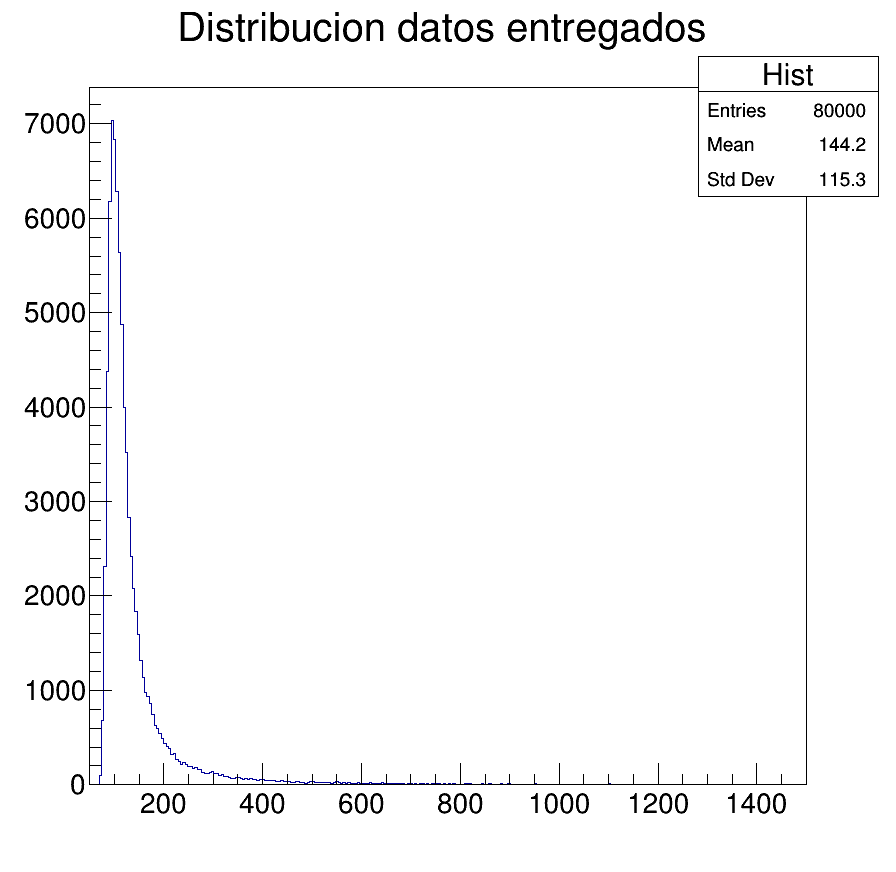

In [10]:
DataChain = ROOT.TChain("SystemTree;1")#Arbol es el nombre del arbol dentro de cada archivo que vamos a anadir a la cadena
DataChain.Add("N1041328785.root")#Añadimos N1041328785 a la cadena

Datos = []

N = DataChain.GetEntries()#Entradas de la cadena, deberian ser 10000 ya que si usamos TBrowser en root veremos que hay 10000 datosx
print (N)

Hist = ROOT.TH1F('Hist', 'Distribucion datos entregados', 300, 50, 1500) 

for entry in (DataChain):
  #Qentry.GetEntry()
  #QHist.Fill(DataChain.GetEntry(entry))
  Hist.Fill(entry.x)
  Datos.append(entry.x)


c1 = ROOT.TCanvas( 'c1', 'The FillRandom example', 200, 10, 900, 900 )
c1.SetFillColor( 0 )
Hist.SetFillColor( 0 )

Hist.Draw()
c1.Update()
ROOT.gROOT.GetListOfCanvases().Draw()

## tarea 2


### distribucion de integracion directa.

In [0]:
# tomando N como el numero de eventos del histograma anterior tenemos 
N=80000
x0 = rnd.random()*(1500-50)+50
X = [x0]

while len(X) < N:
  
  xp = rnd.random()*(1500-50)+50
  deltaS = -np.log(P(xp)/P(X[-1]))

  if deltaS < 0:
    X.append(xp)
  
  else:
    x = rnd.random()
    if x < P(xp)/P(X[-1]):
      X.append(xp)

### distrbucion de landau propia de ROOT
dado el inconveniente de optimizacion para la integracion directa se uso la funcion de distribucion de ROOT 

In [0]:
N=80000

x0 = rnd.random()*(1500-50)+50
X = [x0]
u = 1
c = 8

def PL(x, u, c):

  return ROOT.TMath.Landau(x,u,c, True)

while len(X) < N:
  
  xp = rnd.random()*(1500-50)+50
  deltaS = -np.log(PL(xp, u, c)/PL(X[-1], u, c))

  if deltaS < 0:
    X.append(xp)
  
  else:
    x = rnd.random()
    if x < PL(xp, 0, 1)/PL(X[-1], u ,c):
      X.append(xp)

### generacion del histograma para la funcion en ROOT, con $\mu = 1$ y $c=8$.

80000


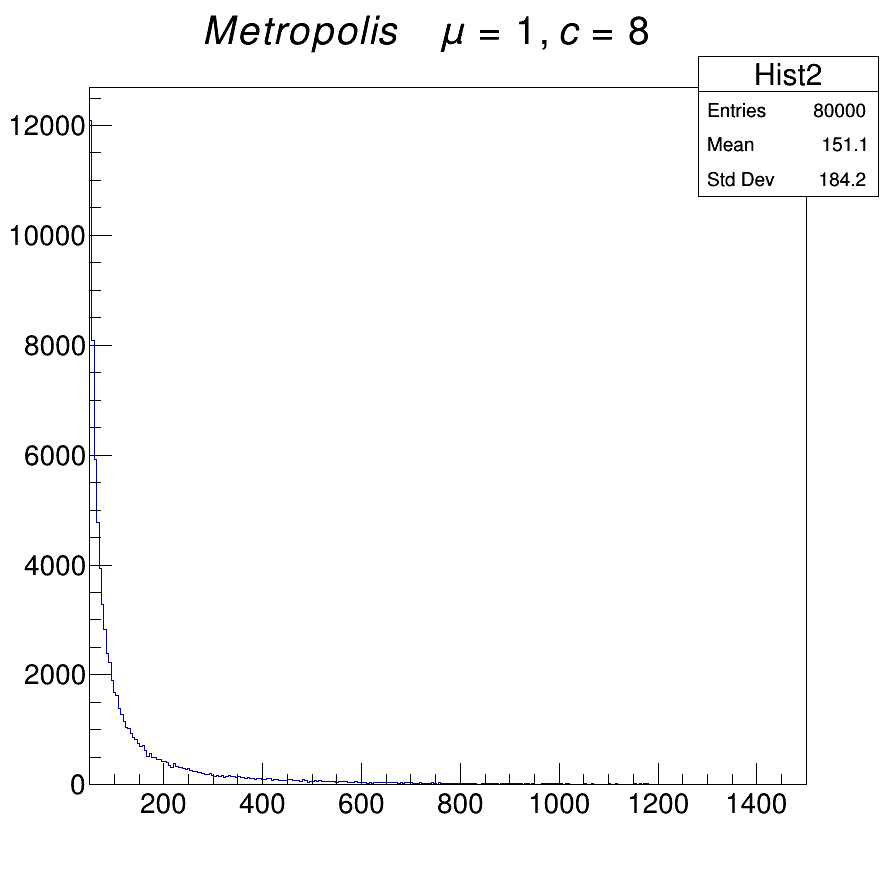

In [12]:
Hist2 = ROOT.TH1F('Hist2', 'Metropolis $\:\mu=1, c=8$', 300, 50, 1500)

for i in X:
  Hist2.Fill(i)

c2 = ROOT.TCanvas( 'c2', 'The FillRandom example', 200, 10, 900, 900 )
c2.SetFillColor( 0 )
Hist2.SetFillColor( 0 )

Hist2.Draw()
c2.Update()
ROOT.gROOT.GetListOfCanvases().Draw()

print(len(X))

## tarea 3 
implementacion  de $\frac{\chi^2}{ndf}$

### definimos una funcion con base en metropolis que permita variar $\mu$ y $c$: $$metropolis(N, P(x), c, \mu)$$



metodo para el proceso de integracion directa

In [0]:
# defino el numero de bins en cada uno de los histogramas anteriores distribucion de integracion diracta

def metropolis(n, P, a, b, C, U):

  u = U
  c = C
  y0 = rnd.random()*(b-a) + a
  Y =[y0]
  counter = 0

  
  while len(Y) < n:
    yp = rnd.random()*(b-a) + a
    ds = -np.log(P(yp)/P(Y[-1]))

    if ds < 0:
      Y.append(yp)
      
    else:
       y = rnd.random() 
       if y < P(yp)/P(Y[-1]):
         Y.append(yp)
  return Y




metodo para la distribucion de Landau en ROOT

In [0]:
#para ROOT landau

def metropolisL(n, P, a, b, C, U):

  y0 = rnd.random()*(b-a) + a
  Y =[y0]
  counter = 0

  
  while len(Y) < n:
    yp = rnd.random()*(b-a) + a
    if P(Y[-1], U, C)!=0:
      ds = -np.log(P(yp, U, C)/P(Y[-1], U, C))

      if ds < 0:
        Y.append(yp)
      
      else:
        y = rnd.random() 
        if y < P(yp, U, C)/P(Y[-1], U, C):
          Y.append(yp)
  return Y


### ahora estudiamos el comportamiento del $\frac{\chi^2}{ndf}$ mediante la definicion:$$ \chi ^2 = \sum_{i=1}^{ndf} \frac{(Datos_i-Metroplis_i)^2}{Datos_i}$$

In [0]:
N = 80000

def chi2(u_var, c_var):

  memoria = []
  memoriahist = []
  memoria_ij = [] # matriz de valores (mu, c)
  

  for i in u_var:
    for j in c_var:
      memoria.append(metropolisL(N, PL, 50, 1500, i, j))
      memoriahist.append(ROOT.TH1F("hist_ij(%f,%f)"%(i,j), 'optimos  $\:(\mu = {}, c = {})$'.format(i,j), 300, 50, 1500 ))
      memoria_ij.append([i,j])

  chi_2 = []
  for k in range(len(memoria)):
    for elemento in memoria[k]:
      memoriahist[k].Fill(elemento)

   
   
    chi= 0.

    for j in range(Hist.GetNbinsX()+1):
      if Hist.GetBinContent(j) != 0:
        chi += ((Hist.GetBinContent(j) - memoriahist[k].GetBinContent(j))**2) / Hist.GetBinContent(j)
    chi_2.append(chi)
  optimos=chi_2.index(min(chi_2))
  print ("este es el mejor $\chi ^2$", min(chi_2)/300)

  Result = [memoriahist[optimos], memoria_ij, np.array(chi_2)/300]
  return  Result




el metodo anterior tambien puede ser aplicado a la funcion de integracion directa de la distribucion

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':


este es el mejor $\chi ^2$ 390.7220359769528


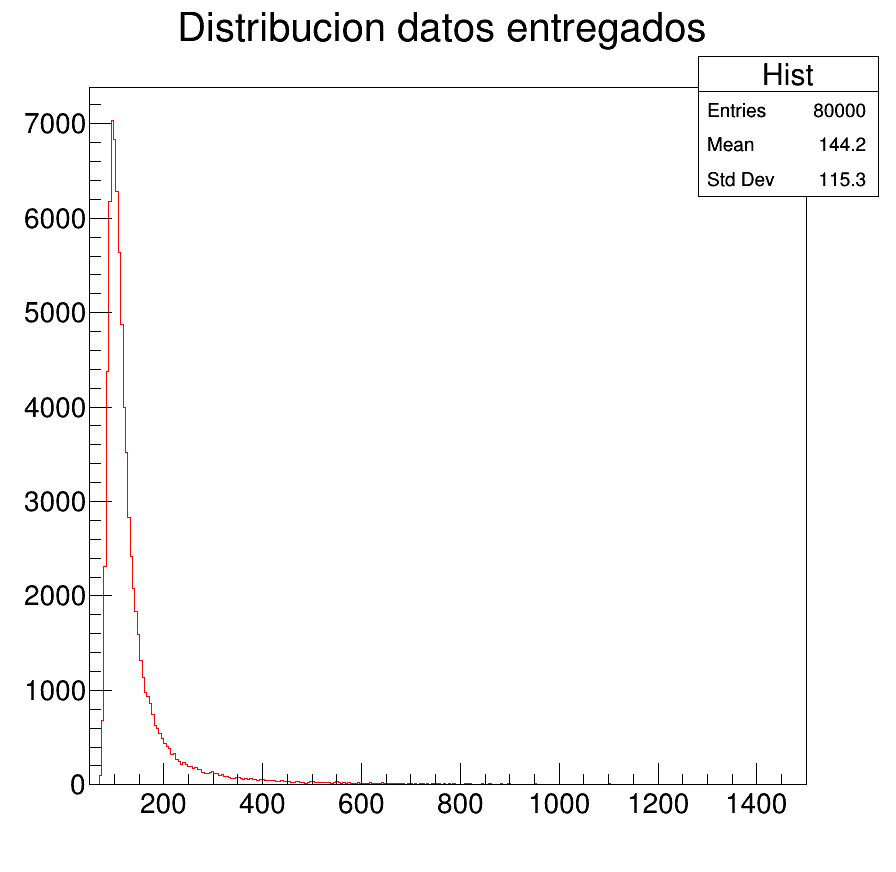

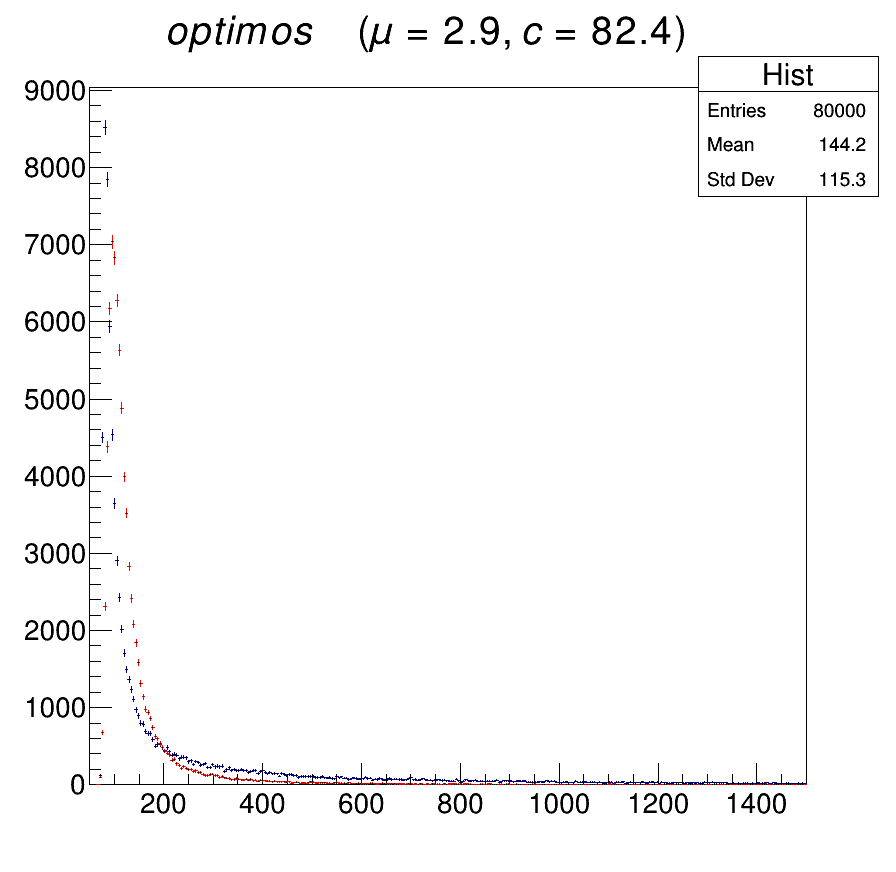

In [15]:
u_var =[2.6, 2.7, 2.8, 2.9, 3., 3.2 ]
c_var =[82.2, 82.3, 82.4]
CHI=chi2(u_var, c_var)

c5 = ROOT.TCanvas( 'c5', 'The FillRandom example', 200, 10, 900, 900 )
c5.SetFillColor(0 )
CHI[0].SetFillColor( 0 )
Hist.SetLineColor(2)

CHI[0].Draw("E")
Hist.Draw("same E")

c5.Update()
ROOT.gROOT.GetListOfCanvases().Draw()



### grafica $\frac{\chi^2(\mu,c)}{ndf}$:


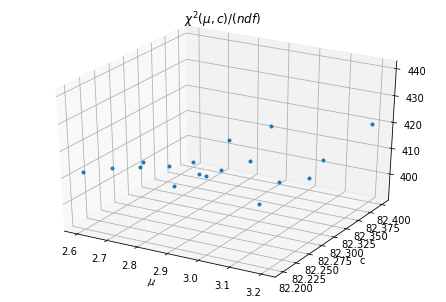

In [27]:
MU = []
C = []
for i in range(len(CHI[1])):
  MU.append(CHI[1][i][0])
  C.append(CHI[1][i][1])

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
Axes3D(fig)
plt.xlabel("$\mu$")
plt.ylabel("c")
plt.title("$\chi^2(\mu,c)/(ndf)$")
plt.plot(MU, C, CHI[2], ".")

In [0]:
c1 = ROOT.TCanvas( 'c1', 'The FillRandom example', 200, 10, 700, 900 )
c1.SetFillColor( 0 )
C.SetFillColor( 0 )

C.Draw()
Hist.Draw()
c1.Update()
ROOT.gROOT.GetListOfCanvases().Draw()

In [0]:
118768.55630453392/300